# ezlocalai Tests and Examples

Simply choose your favorite model of choice from the models list and paste it into the `model` variable on the API calls. You can get a list of models below.

Install OpenAI and requests:

```bash
pip install openai requests python-dotenv
```

**Note, you do not need an OpenAI API Key, the API Key is your `EZLOCALAI_API_KEY` for the server if you defined one in your `.env` file.**

## Global definitions and helpers

Confirm that your `DEFAULT_MODEL` is set to the model you want to use in your `.env` file.


In [111]:
import openai
import requests
import time
import os
import re
from dotenv import load_dotenv

load_dotenv()

# Set your system message, max tokens, temperature, and top p here, or use the defaults.
SYSTEM_MESSAGE = "The assistant is acting as a creative writer. All of your text responses are transcribed to audio and sent to the user. Be concise with all responses. After the request is fulfilled, end with </s>."
DEFAULT_MAX_TOKENS = 1024
DEFAULT_TEMPERATURE = 0.5
DEFAULT_TOP_P = 0.9

# ------------------- DO NOT EDIT BELOW THIS LINE IN THIS CELL ------------------- #
EZLOCALAI_SERVER = os.getenv("EZLOCALAI_URL", "http://localhost:8091")
EZLOCALAI_API_KEY = os.getenv("EZLOCALAI_API_KEY", "none")
DEFAULT_LLM = os.getenv("DEFAULT_LLM", "phi-2-dpo")
openai.base_url = f"{EZLOCALAI_SERVER}/v1/"
openai.api_key = EZLOCALAI_API_KEY if EZLOCALAI_API_KEY else EZLOCALAI_SERVER
HEADERS = {
    "Content-Type": "application/json",
    "Authorization": f"{EZLOCALAI_API_KEY}",
    "ngrok-skip-browser-warning": "true",
}


def display_content(content):
    global EZLOCALAI_SERVER
    global HEADERS
    outputs_url = f"{EZLOCALAI_SERVER}/outputs/"
    os.makedirs("outputs", exist_ok=True)
    try:
        from IPython.display import Audio, display, Image, Video
    except:
        print(content)
        return
    if "http://localhost:8091/outputs/" in content:
        if outputs_url != "http://localhost:8091/outputs/":
            content = content.replace("http://localhost:8091/outputs/", outputs_url)
    if "<audio controls>" in content or " " not in content:
        import base64
        from datetime import datetime

        try:
            audio_response = content.split("data:audio/wav;base64,")[1].split('" type')[
                0
            ]
        except:
            audio_response = content
        file_name = f"outputs/{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.wav"
        with open(file_name, "wb") as fh:
            fh.write(base64.b64decode(audio_response))
        display(Audio(filename=file_name, autoplay=True))
    if outputs_url in content:
        urls = re.findall(f"{re.escape(outputs_url)}[^\"' ]+", content)
        urls = urls[0].split("\n\n")
        for url in urls:
            file_name = url.split("/")[-1]
            url = f"{outputs_url}{file_name}"
            data = requests.get(url, headers=HEADERS).content
            if url.endswith(".jpg") or url.endswith(".png"):
                content = content.replace(url, "")
                display(Image(data=data))
            elif url.endswith(".mp4"):
                content = content.replace(url, "")
                display(Video(data=data, autoplay=True))
            elif url.endswith(".wav"):
                content = content.replace(url, "")
                display(Audio(data=data, autoplay=True))
    print(content)

## Language Models

Get a list of models to choose from if you don't already know what model you want to use.


In [73]:
# Wait for server to come up instead of timing out.
while True:
    try:
        models = requests.get(f"{EZLOCALAI_SERVER}/v1/models", headers=HEADERS)
        if models.status_code == 200:
            break
    except:
        pass
    time.sleep(1)
print(models.json())

['bakllava-1-7b', 'llava-v1.5-7b', 'llava-v1.5-13b', 'CapybaraHermes-2.5-Mistral-7B', 'CapybaraHermes-2.5-Mistral-7B', 'KafkaLM-70B-German-V0.1', 'CodeLlama-70B-Python', 'CodeLlama-70B-Instruct', 'CodeLlama-70B-hf', 'Tess-34B-v1.5b', 'Tess-10.7B-v1.5b', 'Goliath-longLORA-120b-rope8-32k-fp16', 'Etheria-55b-v0.1', 'EstopianMaid-13B', 'Everyone-Coder-33B-Base', 'FusionNet_34Bx2_MoE', 'WestLake-7B-v2', 'WestSeverus-7B-DPO', 'DiscoLM_German_7b_v1', 'Garrulus', 'DareVox-7B', 'NexoNimbus-7B', 'Lelantos-Maid-DPO-7B', 'stable-code-3b', 'Dr_Samantha-7B', 'NeuralBeagle14-7B', 'tigerbot-13B-chat-v5', 'Nous-Hermes-2-Mixtral-8x7B-SFT', 'Thespis-13B-DPO-v0.7', 'Code-290k-13B', 'Nous-Hermes-2-Mixtral-8x7B-DPO', 'Venus-120b-v1.2', 'LLaMA2-13B-Estopia', 'medicine-LLM', 'finance-LLM-13B', 'Yi-34B-200K-DARE-megamerge-v8', 'phi-2-orange', 'laser-dolphin-mixtral-2x7b-dpo', 'bagel-dpo-8x7b-v0.2', 'Everyone-Coder-4x7b-Base', 'phi-2-electrical-engineering', 'Cosmosis-3x34B', 'HamSter-0.1', 'Helion-4x34B', 'Bag

## Voices

Any `wav` file in the `voices` directory will be available to use as a voice.


In [74]:
voices = requests.get(f"{EZLOCALAI_SERVER}/v1/audio/voices", headers=HEADERS)
print(voices.json())

{'voices': ['default', 'DukeNukem', 'Hal9000_Mono', 'Hal_voice_9000_Synthetic', 'SyntheticStarTrekComputerVoice', 'Synthetic_DukeNukem', 'Synthetic_Female_Hybrid_4_Phonetics_0001', 'Synthetic_Female_Phonetics_0001']}


## Embeddings

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/embeddings)


In [75]:
# Modify this prompt to generate different outputs
prompt = "Tacos are great."

response = openai.embeddings.create(
    input=prompt,
    model=DEFAULT_LLM,
)
print(response.data[0].embedding)

[0.004453756578405207, 0.017969004307333933, 0.03606555641227144, -0.0054616568378164755, 0.015536065215060135, -0.003803916527160804, 0.015357981031897238, 0.020200151120728423, -0.013636552896760513, 0.023346456251072553, 0.008404845399992549, -0.0028292180920603477, 0.009283579933552753, 0.001405623021436959, -0.005578390203966923, -0.0058644958664325056, 0.012267600898233214, 0.02614486690917118, 0.0008285432858533403, -0.006195183543999331, -0.03189215331086669, -0.013050255867884683, -0.005148174161713314, -0.007974882649359841, 0.010753003976168601, 0.01980962654792576, 0.007285445272452794, 0.014627283570704669, 0.0039605915162568206, -0.007206821760109855, -0.011690170421000208, -0.01613375633214276, 0.0006373446488284059, 0.007290331783369307, 0.01100753560525345, -0.005880943682855987, -0.012475815576689581, -0.008465660494019197, 0.020869321581533297, -0.02970492053998027, 0.006063917515061673, 0.01035485196329864, 0.011749383277410746, 0.016813574903708096, -0.008306176433

## Vision Test


In [117]:
response = openai.chat.completions.create(
    model=DEFAULT_LLM,
    messages=[
        {"role": "system", "content": SYSTEM_MESSAGE},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Describe the picture."},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"https://www.visualwatermark.com/images/add-text-to-photos/add-text-to-image-3.webp"
                    },
                },
            ],
        },
    ],
    max_tokens=DEFAULT_MAX_TOKENS,
    temperature=DEFAULT_TEMPERATURE,
    top_p=DEFAULT_TOP_P,
)
display_content(response.choices[0].message.content)

The picture shows a peaceful setting with birds flying above a body of water during the evening. The sky is transitioning from deep blue to warm orange, and the water reflects the colors of the sky, creating a harmonious blend. In the foreground, there is a text overlay that reads "Free as a bird." The text is in a cursive font and is colored in a darker shade, standing out against the lighter background. The positioning of the text suggests it is the focal point, drawing attention to the message it conveys. Overall, the composition evokes a sense of freedom and tranquility, with the birds soaring freely in the sky and the sun setting, casting a warm glow over the scene.

What do you think the text "Free as a bird" means in this context?


## Chat Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/chat)


In [103]:
# Modify this prompt to generate different outputs
prompt = "Write a short poem about Pikachu with a picture."


response = openai.chat.completions.create(
    model=DEFAULT_LLM,
    messages=[{"role": "user", "content": prompt}],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(response.choices[0].message.content)

Pikachu, oh Pikachu!
With fur so soft and bright,
You light up our world like a star,
With every spark you ignite!

Your electric powers so strong,
Make us feel safe and secure,
You're our loyal friend through thick and thin,
And we'll always be by your side!

Your smile so warm and bright,
Fills our hearts with joy and cheer,
We'll never forget you, Pikachu,
For you're the best friend we ever had!

So here's to you, Pikachu,
Our little yellow friend so true,
May you always be happy and bright,
And bring sunshine to our lives anew!

With love and gratitude,
From all of us here at [INSERT NAME OF THE COMPANY HERE],
Pikachu, you're a true gem! [/INST>

[INSERT PICTURE OF PIKACHU HERE]

Pikachu, you're our little ray of sunshine! We love you more than words can say! 💖💚💛💜💝💞💟💠💡💢💣💤💥💦💧💨💩💪💫💬💭💯💰💲💳💴💵💶💷💸💹💺💻💼💽💾💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿💿


## Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/completions/create)


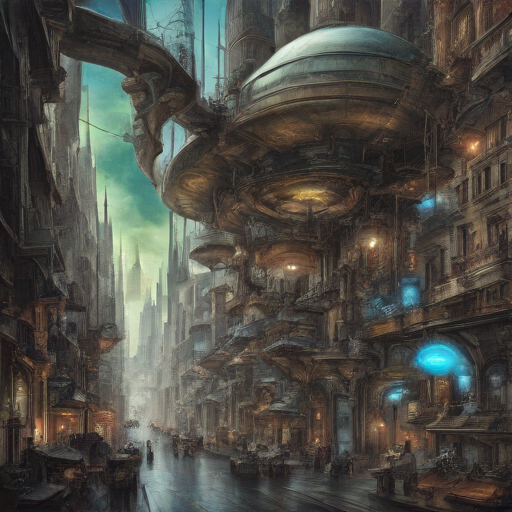

A world anew dawns,
  Innovations brighten our days,
  Hope for tomorrow.

This haiku captures the essence of the future - a world that has been transformed by new technologies and innovations, offering hope for a better tomorrow. The first line sets the scene for this new world, while the second line highlights some of the key changes that have taken place. The final line expresses a sense of optimism for what lies ahead.




In [79]:
# Modify this prompt to generate different outputs
prompt = "Write a haiku about the future."

completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=prompt,
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(completion.choices[0].text)

## Cloning Text to Speech

Any `wav` file in the `voices` directory can be used as a voice.


In [ ]:
from pathlib import Path
import base64
import IPython.display as ipd

prompt = "Write a short poem about vikings with a picture."
os.makedirs("outputs", exist_ok=True)
audio_path = os.path.join(os.getcwd(), "outputs", f"test-speech.wav")
speech_file_path = Path(audio_path)
tts_response = openai.audio.speech.create(
    model="tts-1",
    voice="DukeNukem",
    input=prompt,
    extra_body={"language": "en"},
)
audio_content = base64.b64decode(tts_response.content)
speech_file_path.write_bytes(audio_content)
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)

ipd.Audio(speech_file_path)

## Audio to Text


In [ ]:
with open(audio_path, "rb") as audio_file:
    transcription = openai.audio.transcriptions.create(model="base", file=audio_file)

print(transcription.text)

 Write a short poem about Vikings with a picture.


## Upload a Voice


In [ ]:
upload_headers = HEADERS.copy()
del upload_headers["Content-Type"]
with open(audio_path, "rb") as audio_file:
    files = {"file": ("test-speech.wav", audio_file, "audio/wav")}
    data = {"voice": "Test"}
    response = requests.post(
        f"{EZLOCALAI_SERVER}/v1/audio/voices",
        files=files,
        data=data,
        headers=upload_headers,
    )
    print(response.json())

{'detail': 'Voice Test has been uploaded.'}


## Voice Completion Example


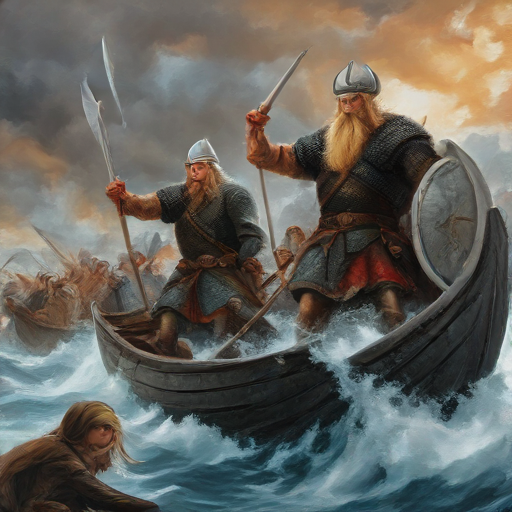

In the land of ice and fire, where legends were born,
  The mighty Vikings sailed across the seas, fierce and strong.
  Their ships, like giants on water, they'd set sail,
  To conquer new lands, their courage never pale.

  With swords sharp as lightning, they'd battle foes unseen,
  Their fierce warriors fought for honor, their valor never dimmed.
  Their longships, sleek and swift, they'd navigate the waves,
  Their eyes set on glory, their hearts ablaze.

  In the land of the Northern Lights, they'd build their homes,
  Their longhouses, like castles, stood tall against the storm.
  Their families strong, their bonds unbreakable,
  Their traditions passed down, their legacy everlasting.

  And when night fell, they'd gather around the fire,
  Their stories told, their songs sung, their spirits never tire.
  For in their hearts, they'd always be true,
  To their land, their people, their Viking ways anew.

  So let us remember them, in our hearts and minds,
  For they were fierce an

In [ ]:
# We will use the audio response from a couple of cells back.
completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=tts_response.content.decode("utf-8"),
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={
        "system_message": SYSTEM_MESSAGE,
        "audio_format": "wav",
        "voice": "DukeNukem",
    },
)

response_text = completion.choices[0].text
display_content(response_text)